C:\Users\ALVIN SUDHAN\AppData\Local\Temp\ipykernel_5692\3824188661.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)


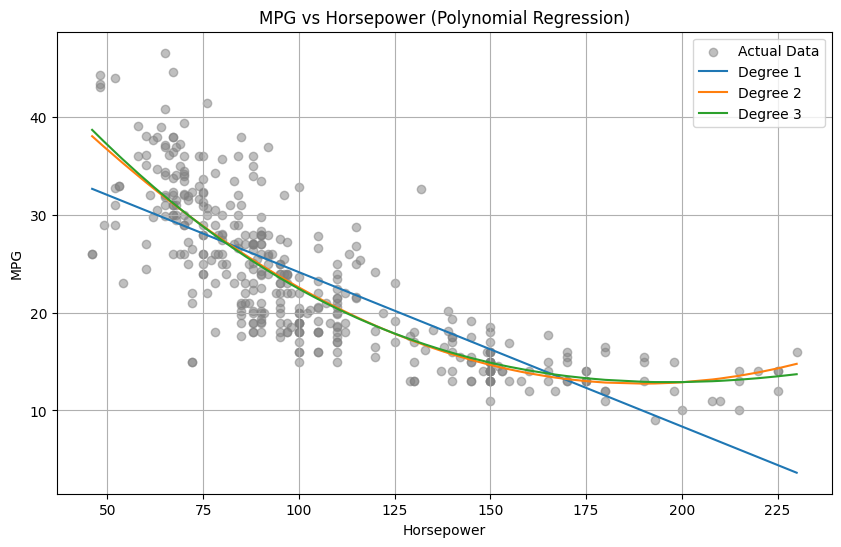


📊 Model Performance:
Linear (Degree 1)    MSE: 23.94, R²: 0.61
Quadratic (Degree 2) MSE: 18.98, R²: 0.69
Cubic (Degree 3)     MSE: 18.94, R²: 0.69


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("auto-mpg.csv")
df['horsepower'].replace('?', np.nan, inplace=True)  
df['horsepower'] = pd.to_numeric(df['horsepower'])   
df.dropna(subset=['horsepower'], inplace=True)       

X = df[['horsepower']].values
y = df['mpg'].values
def fit_and_plot_poly(degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    sort_idx = X.flatten().argsort()
    X_sorted = X[sort_idx]
    y_sorted = y_pred[sort_idx]

    plt.plot(X_sorted, y_sorted, label=f'Degree {degree}')
    return mse, r2
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Actual Data')
mse1, r21 = fit_and_plot_poly(1)
mse2, r22 = fit_and_plot_poly(2)
mse3, r23 = fit_and_plot_poly(3)

plt.title("MPG vs Horsepower (Polynomial Regression)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.grid(True)
plt.show()

print("\n📊 Model Performance:")
print(f"Linear (Degree 1)    MSE: {mse1:.2f}, R²: {r21:.2f}")
print(f"Quadratic (Degree 2) MSE: {mse2:.2f}, R²: {r22:.2f}")
print(f"Cubic (Degree 3)     MSE: {mse3:.2f}, R²: {r23:.2f}")